## PEI Election Data

Using the data from [Elections PEI - Open Data](https://www.electionspei.ca/resources/open-data), and more specifically [Yearly Political Party Contributions - Open Data](https://www.electionspei.ca/yearly-political-party-contributions-open-data), we create some visualizations of the data.

After cleaning the data, we can begin the visualizations, etc.

In [1]:
%matplotlib inline
# Dependencies.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Data.
df = pd.read_csv('../resources/transformed_data/election_contributions_transformed.csv')
df

,Year,Party,Last_Name,First_Name,Address,Community,Postal_Code,Province,Amount
0,2011,Green Party of Prince Edward Island,Lanthier,Peter,NaN,Mermaid,NaN,NaN,350.00
1,2011,Green Party of Prince Edward Island,Lanthier,Darcie,NaN,Mermaid,NaN,NaN,400.00
2,2011,Green Party of Prince Edward Island,Munves,Barbara,NaN,Charlottetown,NaN,NaN,500.00
3,2011,Green Party of Prince Edward Island,Green Party of Canada,NaN,NaN,Malpeque Association,NaN,NaN,5300.00
4,2011,The Island Party of P.E.I.,Ferguson,George,NaN,Murray River,NaN,NaN,400.00
...,...,...,...,...,...,...,...,...,...
7746,2020,Progressive Conservative Association of Prince...,Walsh,Margaret Ann,NaN,Watervale,NaN,PE,1500.00
7747,2020,Progressive Conservative Association of Prince...,Wellner,William,NaN,Charlottetown,NaN,PE,3000.00
7748,2020,Progressive Conservative Association of Prince...,Wheatley,Ross,NaN,Stratford,NaN,PE,310.26
7749,2020,Progressive Conservative Association of Prince...,Wheeler,Sean,NaN,Charlottetown,NaN,PE,500.00


In [3]:
# Get value order (find highest-lowest).
party_order = df.groupby(['Party'])['Amount'].sum().sort_values(ascending=False).index.tolist()

# Remove Island Party due to being so low, causing vizualization issues.
del party_order[-1]

party_order

['Prince Edward Island Liberal Association',
 'Progressive Conservative Association of Prince Edward Island',
 'New Democratic Party of Prince Edward Island',
 'Green Party of Prince Edward Island']

In [4]:
# Group by years, then parties, summing the Amount column.
group_df = pd.DataFrame(df.groupby(['Year', 'Party'])['Amount'].sum(), columns=['Amount'])
group_df.head()

Amount
Year Party                                                        
2011 Green Party of Prince Edward Island                   6550.00
     New Democratic Party of Prince Edward Island         13900.00
     Prince Edward Island Liberal Association            759590.54
     Progressive Conservative Association of Prince ...  290708.33
     The Island Party of P.E.I.                            5540.00

In [5]:
# Unstack the DF.
unstack_df = group_df.unstack()
unstack_df.columns = unstack_df.columns.droplevel()
# Sort by value list above.
unstack_df = unstack_df[party_order]
unstack_df

Party,Prince Edward Island Liberal Association,Progressive Conservative Association of Prince Edward Island,New Democratic Party of Prince Edward Island,Green Party of Prince Edward Island
Year,,,,
2011,759590.54,290708.33,13900.00,6550.00
2012,416509.09,185220.17,48537.53,2150.00
2013,451319.57,190600.50,40075.54,960.00
2014,522114.75,286356.81,31644.00,2300.00
2015,870965.30,487840.71,76836.00,23243.00
2016,403423.64,173365.04,25173.00,21690.00
2017,362209.45,203017.98,23300.00,43634.88
2018,361420.16,133093.19,64042.00,41847.50
2019,390686.24,466555.02,44116.00,114652.84


In [6]:
# Drop the year 2020 - data unfinished based on other year values.
unstack_df = unstack_df.drop(index=2020)
unstack_df

Party,Prince Edward Island Liberal Association,Progressive Conservative Association of Prince Edward Island,New Democratic Party of Prince Edward Island,Green Party of Prince Edward Island
Year,,,,
2011,759590.54,290708.33,13900.00,6550.00
2012,416509.09,185220.17,48537.53,2150.00
2013,451319.57,190600.50,40075.54,960.00
2014,522114.75,286356.81,31644.00,2300.00
2015,870965.30,487840.71,76836.00,23243.00
2016,403423.64,173365.04,25173.00,21690.00
2017,362209.45,203017.98,23300.00,43634.88
2018,361420.16,133093.19,64042.00,41847.50
2019,390686.24,466555.02,44116.00,114652.84


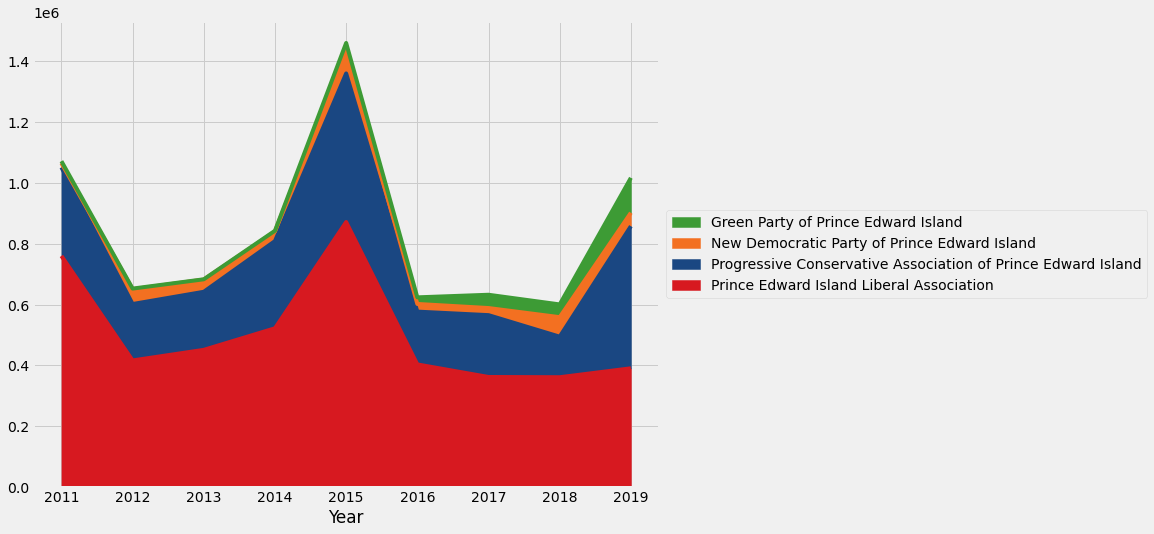

In [7]:
# Plot the DF.
ax = unstack_df.plot.area(figsize=(10, 8), color=['#D71920', '#1A4782', '#F37021', '#3D9B35'])

# Add a legend off to the side of the chart.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

In [8]:
# And for 100% instead of by value.
# Create a DataFrame with the unstacked data for an area chart - (to 100%).
oneh_df = group_df.unstack()
oneh_df.columns = oneh_df.columns.droplevel()
oneh_df = oneh_df[party_order]
oneh_df = oneh_df.apply(lambda x: x*100/sum(x), axis=1)
oneh_df

Party,Prince Edward Island Liberal Association,Progressive Conservative Association of Prince Edward Island,New Democratic Party of Prince Edward Island,Green Party of Prince Edward Island
Year,,,,
2011,70.940121,27.150001,1.298157,0.611721
2012,63.840952,28.389853,7.439651,0.329544
2013,66.083295,27.908183,5.867957,0.140566
2014,61.978289,33.992346,3.756341,0.273024
2015,59.700751,33.439285,5.266762,1.593203
2016,64.687333,27.798376,4.036388,3.477903
2017,57.296907,32.114850,3.685762,6.902480
2018,60.196277,22.167315,10.666505,6.969904
2019,38.452988,45.920313,4.342083,11.284616


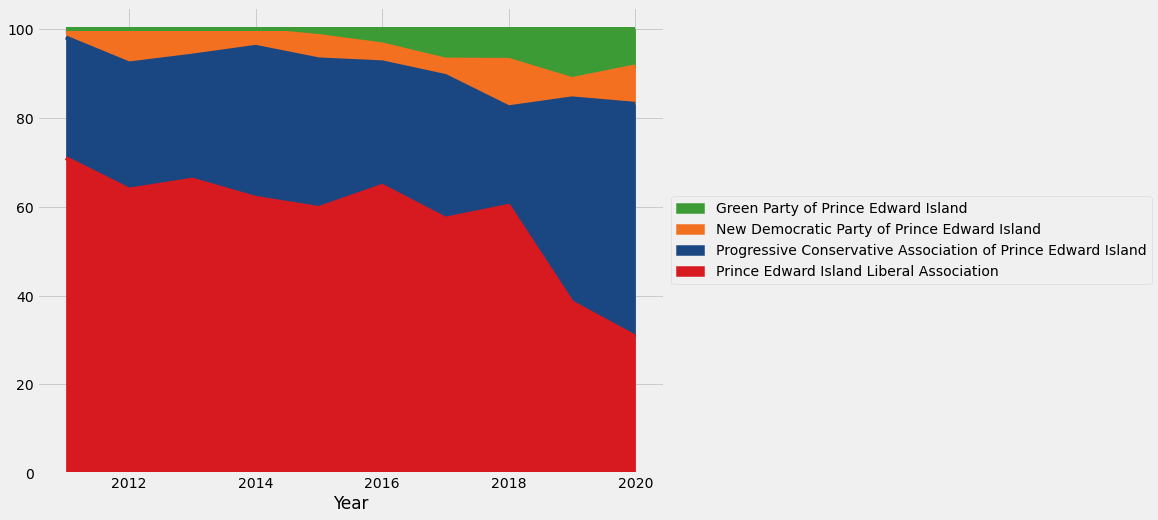

In [9]:
# Plot the DF.
ax = oneh_df.plot.area(figsize=(10, 8), color=['#D71920', '#1A4782', '#F37021', '#3D9B35'])

# Add a legend off to the side of the chart.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))